In [6]:
import pandas as pd
import seaborn as sns
import numpy as np

# Dataset presentation

The dataset used is the famous HTRU_2 dataset about pulsar. The notebook has the goal to provide a quick overview of the dataset and to show how it is important to preprocess the data before applying machine learning algorithms.

In [2]:
df = pd.read_csv('./data/HTRU_2.csv', header=None)
df.columns = ['IpMean', 'IpDev', 'IpKurt','IpSkew', 'DMMean', 'DMDev', 'DMKurt', 'DMSkew', 'Class']
df.head()

,IpMean,IpDev,IpKurt,IpSkew,DMMean,DMDev,DMKurt,DMSkew,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


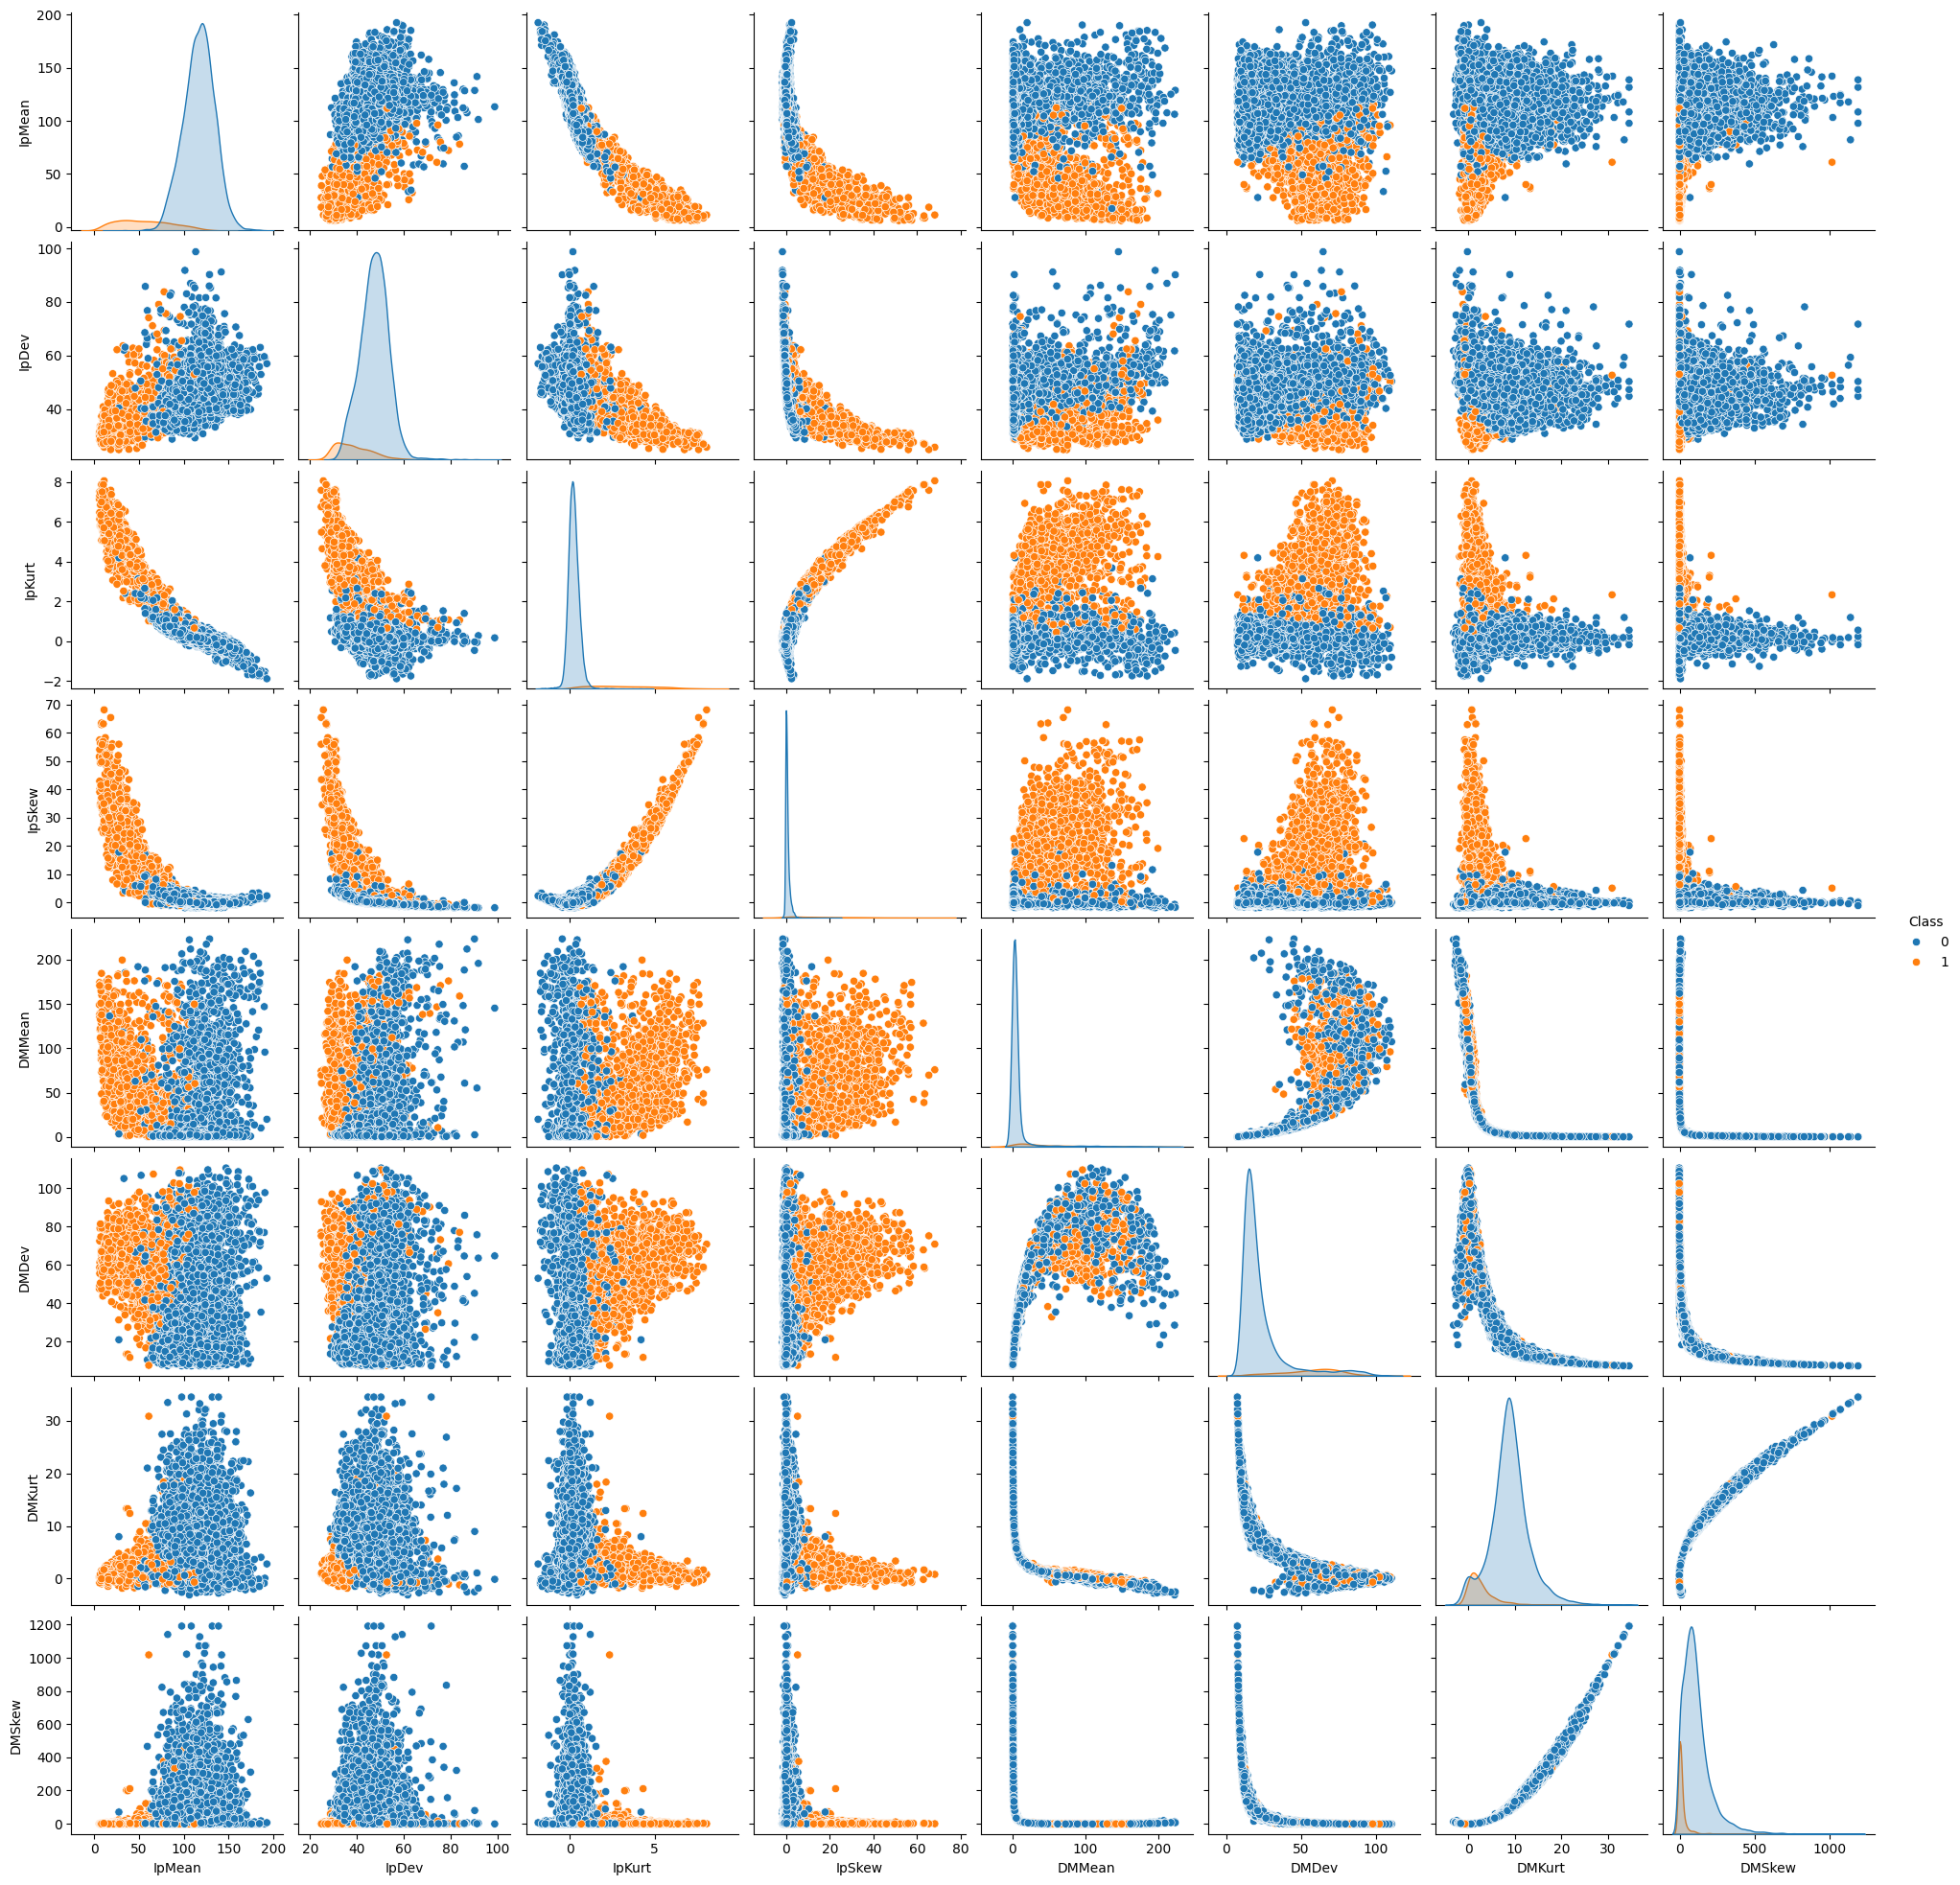

In [4]:
# Mean and standard deviation of each class
df.groupby('Class').mean()
df.groupby('Class').std()

# Visualize the data
sns.pairplot(df, hue='Class')

As you can see, the dataset is composed of a binary classification problem. The target variable is the `target_class` column, which is a binary variable that indicates if the object is a pulsar or not. The other columns are features that describe the object. From the feature, it appears evident that a linear regression could be a good choice to separate the two classes base on some features. Each feature aren't normalized, so it is important to normalize them before applying the algorithm.

In [5]:
taille = len(df)
ratio = list(np.bincount(df['Class']) / len(df) * 100)

print('Percentage of each class')
print('Non pulsar : ', ratio[0])
print('Pulsar : ', ratio[1])

Percentage of each class
Non pulsar :  90.8425522404738
Pulsar :  9.157447759526203


Because the dataset is mostly composed of data that aren't pulsar, it is important to preprocess them before training the model. If we don't do that, the model will be biased towards the majority class and will not be able to predict the minority class. The model could reach 90% accuracy by predicting only the majority class.